# Project: Investigate a Dataset - TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


>The TMDB Movie Dataset has a total of **10866** entries/records and **21** columns and was collected from 
    The Movie Database (TMDb), including user ratings and revenue.

>Certain columns, like **‘cast’** and **‘genres’**, contain multiple values separated by **pipe (|)** characters.

>The final two columns ending with **“_adj”** show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time.




### Question(s) for Analysis

>- Which genres are most popular from year to year?
>- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Observed problems with Dataset
> - Columns with missing values: cast,director,genres,production_companies, homepage, tagline, keywords and overview.
> - Dataset also has budget value of '0' which will be treated as missing values since movie badget cannot be '0'
> - The columns cast, genre and production_companies have their values seperated by '|'

<a id='wrangling'></a>
## Data Wrangling

>- First I will handle the invalid value in the budget column
>- Next I handled missing values
>- Finally I removed the separator '|' and converted the values to an array within the dataframe

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

#### Handling Invalid Budget Values

Some budget values where recorded as 0, which is incorrect and will be considered as a missing value.
There where a total of 5000+ records with invalid records, which makes up about 50% of the dataset, hence droping these values cannot be considered. The method used is to replace the missing values with the mean budget.

In [5]:
mean_budget = round(df['budget'].mean())
mean_budget

14625701

In [6]:
df['budget'] = df['budget'].replace(0,mean_budget)

In [7]:
#Handling missing values for cast, director,genres,production_companies

In [8]:
df['cast'].fillna(" ", inplace=True)

In [9]:
df['director'].fillna(" ", inplace=True)

In [10]:
df['genres'].fillna(" ", inplace=True)

In [11]:
df['production_companies'].fillna(" ", inplace=True)

In [12]:
df['homepage'].fillna(" ", inplace=True)

In [13]:
df['keywords'].fillna(" ", inplace=True)

In [14]:
df['tagline'].fillna(" ", inplace=True)

In [15]:
df['overview'].fillna(" ", inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   homepage              10866 non-null  object 
 8   director              10866 non-null  object 
 9   tagline               10866 non-null  object 
 10  keywords              10866 non-null  object 
 11  overview              10866 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  10866 non-null  object 
 15  release_date       

#### Splitting and Converting to array

In [17]:
df['cast'] = df['cast'].str.split('|')

In [18]:
df['genres'] = df['genres'].str.split('|')

In [19]:
df['production_companies'] = df['production_companies'].str.split('|')

In [20]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which genres are most popular from year to year?

>In order to do this I will create a function that takes in the year as a parameter and then counts how many times each genre
appears within that year. Once the function is called it will plot a bar chart of the counts of each genre within the year.

In [21]:
def genres(x):
    yearly_df = df[df['release_year'] == x]
    yearly_df = yearly_df['genres'].explode()
    return yearly_df.value_counts().plot(kind='bar')

In [22]:
print(df['release_year'].unique())

[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]


In [23]:
# Convert to List
list1 = df['release_year'].unique().tolist()

In [24]:
list1.sort()
list1

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

>Since there are a 56 years present, it will be much easier to plot the graph of every 5 years from 1960-2015;
which will be a total of 12plots

<AxesSubplot:>

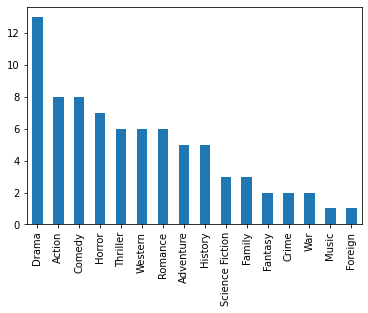

In [25]:
genres(1960)

<AxesSubplot:>

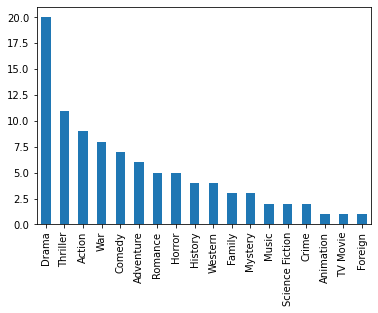

In [26]:
genres(1965)

<AxesSubplot:>

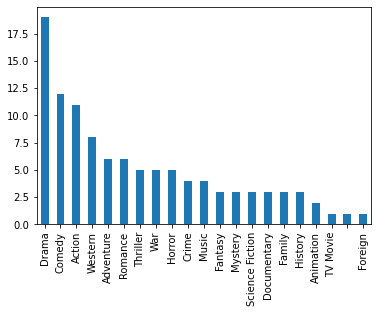

In [27]:
genres(1970)

<AxesSubplot:>

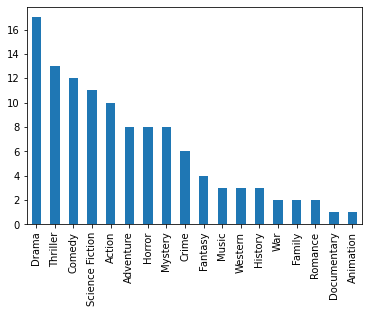

In [28]:
genres(1975)

<AxesSubplot:>

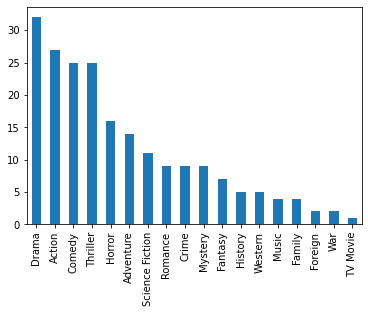

In [29]:
genres(1980)

<AxesSubplot:>

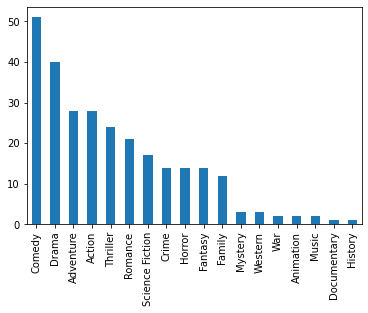

In [30]:
genres(1985)

<AxesSubplot:>

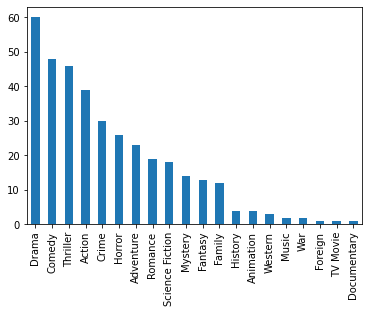

In [31]:
genres(1990)

<AxesSubplot:>

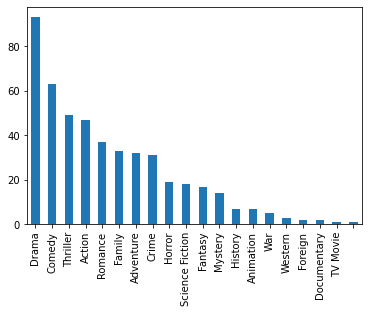

In [32]:
genres(1995)

<AxesSubplot:>

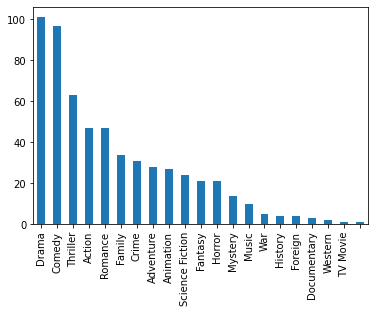

In [33]:
genres(2000)

<AxesSubplot:>

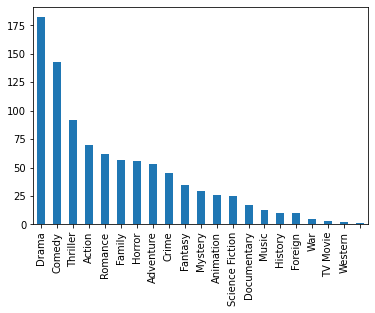

In [34]:
genres(2005)

<AxesSubplot:>

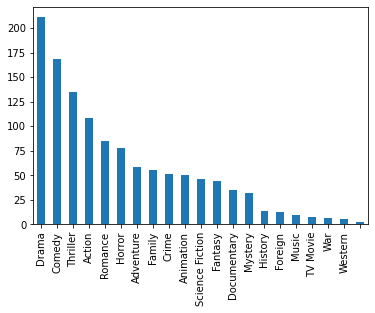

In [35]:
genres(2010)

<AxesSubplot:>

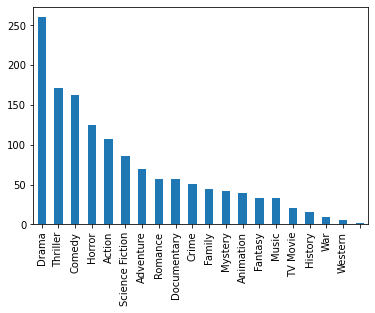

In [36]:
genres(2015)

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

    First I pick the mean of the high revenue movies and make a condition that:
    If a movie has revenue greater or than the mean, then we will consider it as a high revenue movie

In [37]:
df['revenue'].describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [38]:
round(df['revenue'].mean())

39823320

In [39]:
high_rev_movies = df[df['revenue'] > 39823320].sort_values(by='revenue', ascending=True)
high_rev_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 7326 to 1386
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2170 non-null   int64  
 1   imdb_id               2170 non-null   object 
 2   popularity            2170 non-null   float64
 3   budget                2170 non-null   int64  
 4   revenue               2170 non-null   int64  
 5   original_title        2170 non-null   object 
 6   cast                  2170 non-null   object 
 7   homepage              2170 non-null   object 
 8   director              2170 non-null   object 
 9   tagline               2170 non-null   object 
 10  keywords              2170 non-null   object 
 11  overview              2170 non-null   object 
 12  runtime               2170 non-null   int64  
 13  genres                2170 non-null   object 
 14  production_companies  2170 non-null   object 
 15  release_date      

    Then I created a funtion that will count all the respective genres

In [40]:
def counter(x):
    counting = {}
    for i in x:
        for i in i:
            if i in counting:
                counting[i] += 1
            else:
                counting[i] = 1
    return counting

In [41]:
high_rev_genres = counter(high_rev_movies['genres'])
high_rev_genres

{'Comedy': 816,
 'Drama': 851,
 'Romance': 352,
 'Horror': 199,
 'Mystery': 174,
 'Thriller': 660,
 'Crime': 354,
 'Music': 71,
 'Science Fiction': 314,
 'Action': 722,
 'History': 73,
 'Adventure': 549,
 'Fantasy': 287,
 'Family': 332,
 'Western': 27,
 'War': 70,
 'TV Movie': 1,
 'Animation': 159,
 'Documentary': 7,
 'Foreign': 1}

    Now we can take a look at the plot of the respective genres present in the high rev movies I defined earlier

<AxesSubplot:>

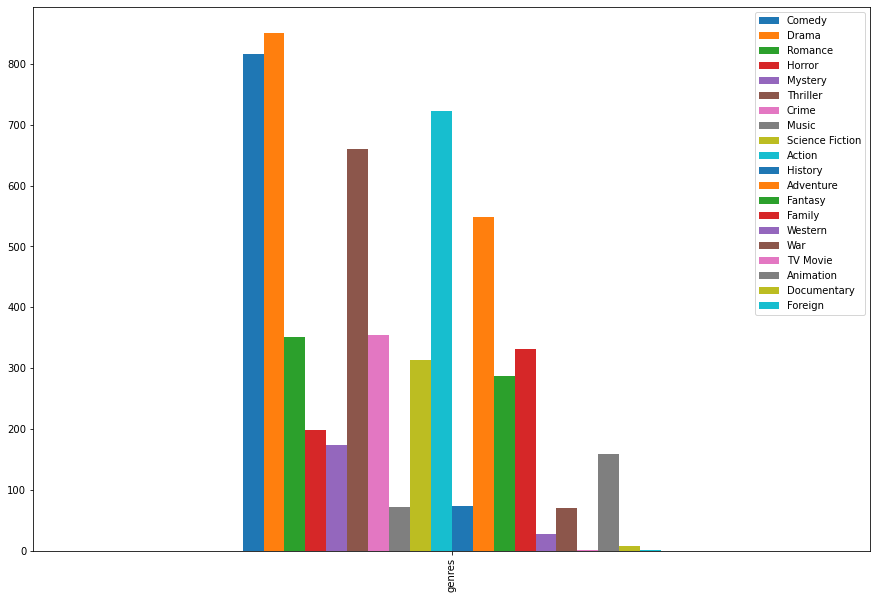

In [42]:
pd.DataFrame(high_rev_genres, index=['genres']).plot(kind='bar', figsize=(15,10))

        Here we can clearly see that the High rev genres usually have Drama, Comedy, Action, Thriller and/or Adventure as
        their genres!

<AxesSubplot:>

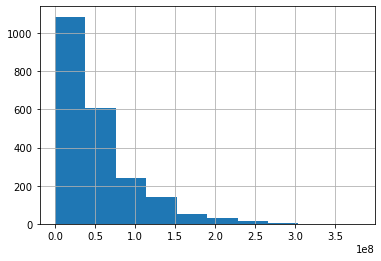

In [43]:
#Now we can take a look at the budget of the high revenue movies
high_rev_movies['budget'].hist()

<AxesSubplot:>

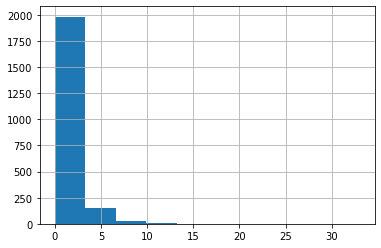

In [44]:
#Now we can take a look at the popularity of the high revenue movies
high_rev_movies['popularity'].hist()

<AxesSubplot:>

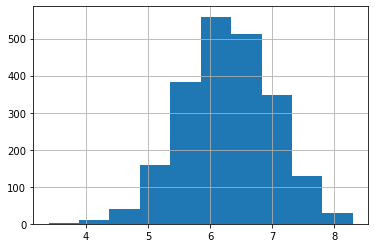

In [45]:
#Now we can take a look at the popularity of the high revenue movies in terms if of vote average
high_rev_movies['vote_average'].hist()

    Finally I would like to view the correlation of all the features we have in our dataset
    with the help of a correlation matrix

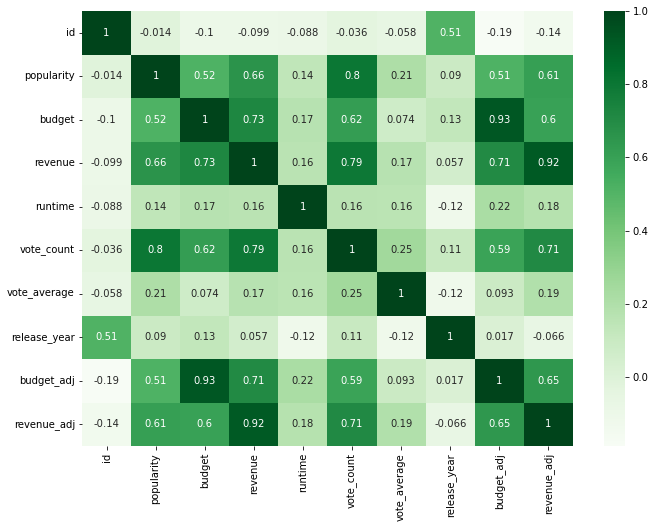

In [46]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

<a id='conclusions'></a>
## Conclusions

>1. As shown by the plots in question 1 we can clearly see that **Drama** is the most popular genre for most years.

>2. For the second question we can see what kind of genres are most popular among the high revenue which is:
    **Drama, Action** and/or **Comedy** ,since they have the highest count amongst the genres.
    
>3. Finally from the correlation matrix, we can observe a strong positive relationship between **revenue** and **vote_count** which **implies the influence of the value of revenue and popularity** of a movie.


## References

https://stackoverflow.com/

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

https://notebook.community/vikashvverma/machine-learning/mlfoundation/istat/project/investigate-a-dataset-template

https://www.delftstack.com/

https://www.geeksforgeeks.org/pandas-array-function-in-python/

https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3

https://www.programiz.com/python-programming/methods/list/sort#:~:text=sort

https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/

<ul>
<li><a href="#intro">Back to top</a></li>
</ul>